In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(435879)

# Simulate data
data = pd.DataFrame({
    'gpa_last_year': np.random.uniform(2.5, 4, 100),
    'treatment': np.random.binomial(n=1, p=0.5, size=100)
})
data['gpa_this_year'] = 0.85*data['gpa_last_year'] + 0.3*data['treatment'] + np.random.uniform(-0.4, 0.4, data.shape[0])
data['gpa_this_year'] = data['gpa_this_year'].clip(upper=4)
data['treatment_factor'] = np.where(data['treatment'] == 1, 'Treatment', 'Control')
data.head()

,gpa_last_year,treatment,gpa_this_year,treatment_factor
0,2.681864,1,2.280444,Treatment
1,3.323482,0,2.908015,Control
2,2.778256,1,2.744848,Treatment
3,3.199914,0,2.403374,Control
4,3.800534,1,3.362648,Treatment


In [3]:
mean_ctr = data[data['treatment'] == 0]['gpa_this_year'].mean()
mean_trt = data[data['treatment'] == 1]['gpa_this_year'].mean()
print(mean_trt - mean_ctr)

0.14132693716381084


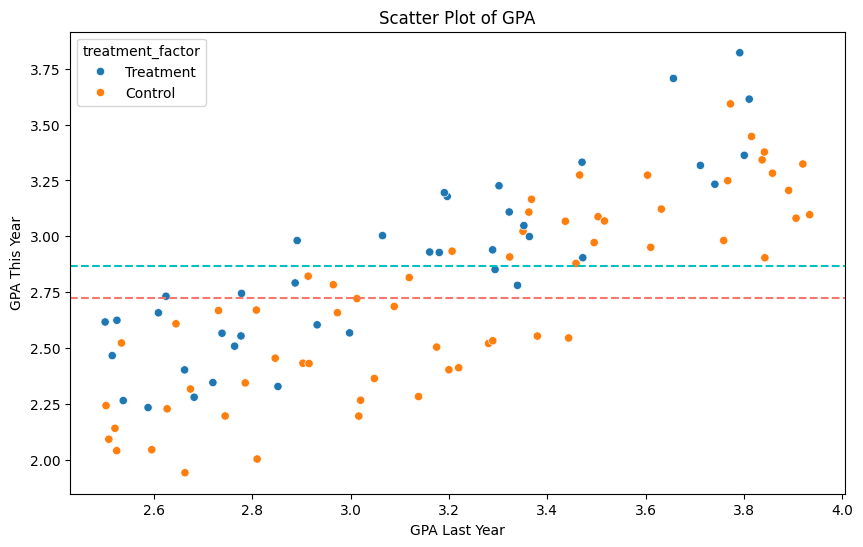

In [4]:
# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gpa_last_year', y='gpa_this_year', hue='treatment_factor')
plt.axhline(mean_ctr, linestyle='--', color='#F8776D')
plt.axhline(mean_trt, linestyle='--', color='#00BFC4')
plt.xlabel('GPA Last Year')
plt.ylabel('GPA This Year')
plt.title('Scatter Plot of GPA')
plt.show()


In [5]:
# Linear regression with statsmodels
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

lm = sm.OLS.from_formula("gpa_this_year ~ treatment", data = data)
fit = lm.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gpa_this_year   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.741
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.101
Time:                        17:09:33   Log-Likelihood:                -53.264
No. Observations:                 100   AIC:                             110.5
Df Residuals:                      98   BIC:                             115.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7243      0.053     51.104      0.000       2.619       2.830
treatment      0.1413      0.085      1.656      0.101      -0.028       0.311
==============================================================================
Omnibus:                        7.212   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                3.324
Skew:                           0.163   Prob(JB):                        0.190
Kurtosis:                       2.169   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:

reg_robust = smf.ols('gpa_this_year ~ treatment', data=data).fit(cov_type='HC1')
Stargazer([fit, reg_robust])



In [7]:

reg_lastgpa = smf.ols('gpa_this_year ~ gpa_last_year', data=data).fit(cov_type='HC1')
Stargazer([reg_lastgpa])


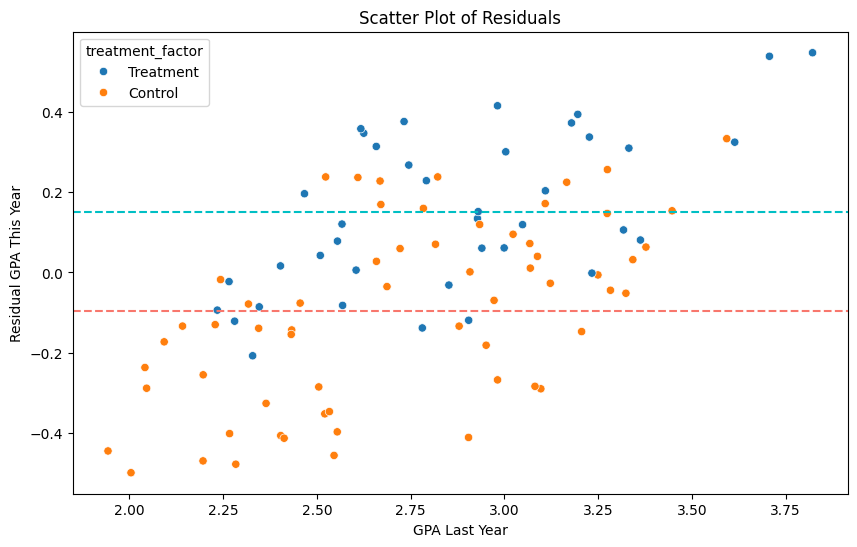

In [8]:

# Plot residuals against treatment
data['residuals'] = reg_lastgpa.resid
mean_ctr_resid = data[data['treatment'] == 0]['residuals'].mean()
mean_trt_resid = data[data['treatment'] == 1]['residuals'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gpa_this_year', y='residuals', hue='treatment_factor')
plt.axhline(mean_ctr_resid, linestyle='--', color='#F8776D')
plt.axhline(mean_trt_resid, linestyle='--', color='#00BFC4')
plt.xlabel('GPA Last Year')
plt.ylabel('Residual GPA This Year')
plt.title('Scatter Plot of Residuals')
plt.show()



In [9]:
# Regress with covariate
reg_covariate_treat = smf.ols('gpa_this_year ~ treatment + gpa_last_year', data=data).fit(cov_type='HC1')
Stargazer([reg_robust, reg_covariate_treat])

In [13]:
np.random.seed(435879)

# Simulate data
data = pd.DataFrame({
    'gpa_last_year': np.random.uniform(2.5, 4, 10000),
    'treatment': np.random.binomial(n=1, p=0.5, size=10000)
})
data['studyeffort'] = 1 + 2*data['treatment'] + np.random.uniform(-0.4, 0.4, data.shape[0])
data['studyeffort2'] = data['studyeffort']

data['gpa_this_year'] = 0.8*data['gpa_last_year'] + .1*data['studyeffort'] + 0.3*data['treatment'] + np.random.uniform(-0.4, 0.4, data.shape[0])
data['gpa_this_year'] = data['gpa_this_year'].clip(upper=4)
data['treatment_factor'] = np.where(data['treatment'] == 1, 'Treatment', 'Control')
data.head()

,gpa_last_year,treatment,studyeffort,studyeffort2,gpa_this_year,treatment_factor
0,2.681864,1,3.227298,3.227298,2.849090,Treatment
1,3.323482,0,0.749758,0.749758,2.635535,Control
2,2.778256,1,2.811556,2.811556,2.639382,Treatment
3,3.199914,1,3.199702,3.199702,2.887829,Treatment
4,3.800534,0,1.148766,1.148766,3.141423,Control


In [14]:
reg_covariate = smf.ols('gpa_this_year ~ treatment', data=data).fit(cov_type='HC1')
reg_covariate_endog = smf.ols('gpa_this_year ~ studyeffort + treatment + gpa_last_year', data=data).fit(cov_type='HC1')
Stargazer([reg_covariate, reg_covariate_endog])